In [11]:
from gg1 import GG1Queue, PDF
import matplotlib.pyplot as plt

# Define the constants for service and arrival time distributions
SERVICE_EXPONENTIAL_KWARGS = {'scale': 1.2}
ARRIVAL_EXPONENTIAL_KWARGS = {'scale': 1.5}

SERVICE_NORMAL_KWARGS = {'loc': 0, 'scale': 1.0}
ARRIVAL_NORMAL_KWARGS = {'loc': 0.5, 'scale': 1.5}

SERVICE_HAWKES_KWARGS = {'mu': 1.2, 'alpha': 1.9, 'beta': 0.5}
ARRIVAL_HAWKES_KWARGS = {'mu': 1.5, 'alpha': 1.8, 'beta': 1.0}

SERVICE_UNIFORM_KWARGS = {'low': 0.5, 'high': 1.5}
ARRIVAL_UNIFORM_KWARGS = {'low': 0, 'high': 0.5}


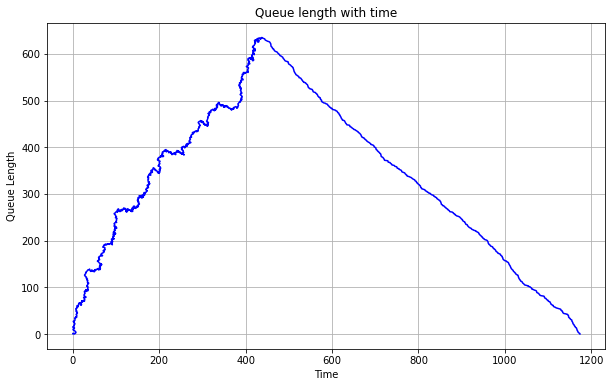

(635, 388.0977885646376)


In [7]:
queue = GG1Queue(1000, PDF.EXPONENTIAL, PDF.NORMAL, SERVICE_EXPONENTIAL_KWARGS, ARRIVAL_NORMAL_KWARGS)
queue.run_simulation()
queue.plot_queue_length()
print(queue.get_queue_stats())


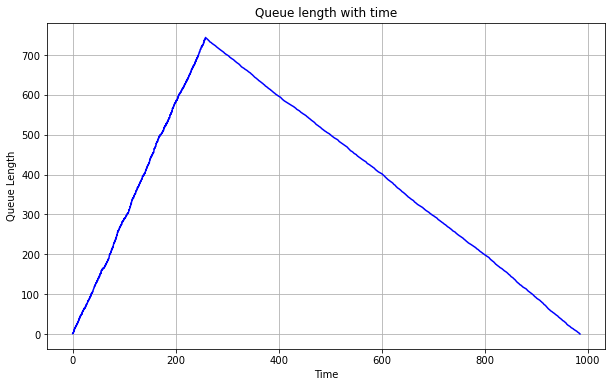

(744, 368.85174800481195)


In [8]:
queue = GG1Queue(1000, PDF.UNIFORM, PDF.UNIFORM, SERVICE_UNIFORM_KWARGS, ARRIVAL_UNIFORM_KWARGS)
queue.run_simulation()
queue.plot_queue_length()
print(queue.get_queue_stats())


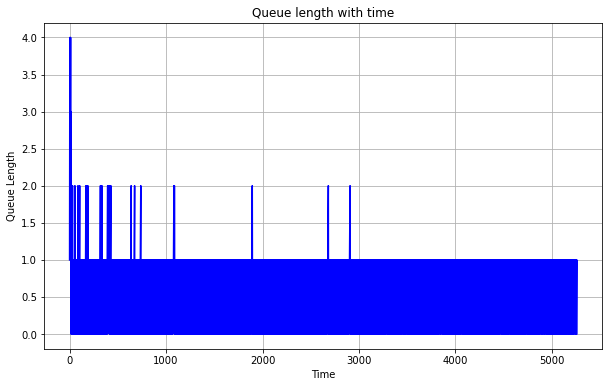

(4, 1.2596839561710957)


In [9]:
queue = GG1Queue(1000, PDF.EXPONENTIAL, PDF.HAWKES, SERVICE_EXPONENTIAL_KWARGS, ARRIVAL_HAWKES_KWARGS)
queue.run_simulation()
queue.plot_queue_length()
print(queue.get_queue_stats())


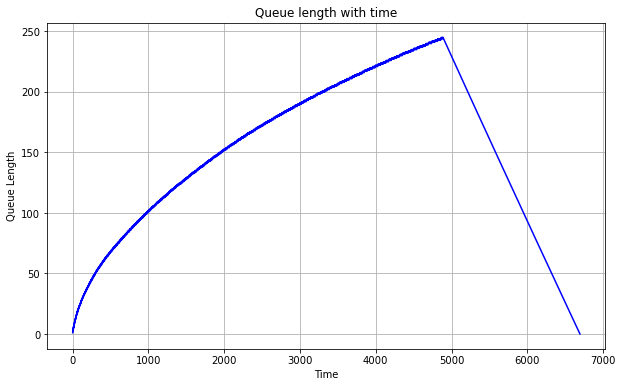

(245, 997.6595719239804)


In [10]:
queue = GG1Queue(1000, PDF.HAWKES, PDF.HAWKES, SERVICE_HAWKES_KWARGS, ARRIVAL_HAWKES_KWARGS)
queue.run_simulation()
queue.plot_queue_length()
print(queue.get_queue_stats())


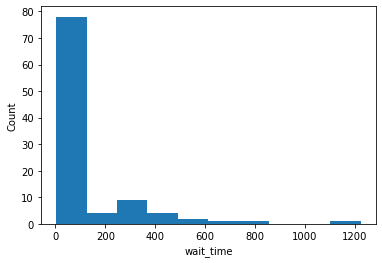

In [12]:
wait_time = []
for _ in range(100):
    queue = GG1Queue(1000, PDF.HAWKES, PDF.HAWKES, SERVICE_HAWKES_KWARGS, ARRIVAL_HAWKES_KWARGS)
    queue.run_simulation()
    _ , wt = queue.get_queue_stats()
    wait_time.append(wt)

plt.hist(wait_time)
plt.xlabel('wait_time')
plt.ylabel('Count')
plt.show()